In [31]:
install.packages("lpSolve")
library(lpSolve) 
install.packages("GenLouvain")
library(GenLouvain)

Warning message:
“package ‘GenLouvain’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


#  1)  MIN Z = 400x + 500y
- 5x + 4y <= 200
- 3x + 5y <= 150
- 5x + 4y >= 100
- 8x + 4y >= 80
- x >= 0
- y >= 0



In [19]:
Obj <- c(300,400 )
Constraints <- matrix(c(5,4,3,5,5,4,8,4), nrow = 4, byrow = TRUE)
Inequality <- c("<=","<=",">=", ">=")
Rhs <- c(200,150,100,80)

result <- lp("max", Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))

Optimal solution:
x1	30.77
x2	11.54

Optimal objective value:
Z = 13846.15


# 2) MIN = 4x + 3y
- 200x + 100y >= 4000 
- x + 2y >= 50 
- 40x + 40y >= 1400 
- x >= 0 
- y >= 0 

In [3]:
Obj <- c(4,3 )
Constraints <- matrix(c(200,100,1,2,40,40), nrow = 3 , byrow = TRUE)
Inequality <- c(">=", ">=",">=")
Rhs <- c(4000,50,1400)

result <- lp("min", Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))

Optimal solution:
x1	5.00
x2	30.00

Optimal objective value:
Z = 110.00


# 3) MAX z = 60*x1 + 26*x2 + 15*x3 + 4.75*x4
- 20*x1 + 9*x2 + 6*x3 + x4 <= 40
- 10*x1 + 4*x1 + 2*x3 +x4  <= 20
- x1 >= 0
- x2 >= 0
- x3 >= 0
- x4 >= 0

In [5]:
Obj <- c(60,26,15,4.75)
Constraints <- matrix(c(20,9,6,1,10,4,2,1), nrow = 2, byrow = TRUE)
Inequality <- c("<=", "<=")
Rhs <- c(40,20)

result <- lp("max", Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))

Optimal solution:
x1	0.00
x2	4.00

Optimal objective value:
Z = 123.00


# 4) MAX Z =  2*x1 + 4*x2
- 1*x1 + 2*x2 <= 5
- 1*x1 + 1*x2 <=4
- x1 >= 0
- x2 >= 0

In [18]:
Obj <- c(2,4 )
Constraints <- matrix(c(1,2,1,1), nrow = 2 , byrow = TRUE)
Inequality <- c("<=", "<=")
Rhs <- c(5,4)

result <- lp("max", Obj, Constraints, Inequality, Rhs)

if (result$status == 0) {
  cat("Optimal Solution:\n")
  cat(sprintf("Z = %.2f\n", result$objval))
  cat("x1 =", result$solution[1], "\n")
  cat("x2 =", result$solution[2], "\n")
  
  if (result$num.bin.sol > 1) {
    cat("\nAlternative Solutions:\n")
    
    for (i in 1:lp$num.bin.sol) {
      cat("Solution", i, ":\n")
      cat("x1 =", result$bin.sol[i, 1], "\n")
      cat("x2 =", result$bin.sol[i, 2], "\n")
    }
  }
} else {
  cat("No solution found.")
}


Optimal Solution:
Z = 10.00
x1 = 0 
x2 = 2.5 


# 5) MAX z = 3x1 +5x2
- x1 - 2x2<= 6
- x1 + 0x2 <=10
- 0x1+ x2  >= 1

In [20]:
Obj <- c(3,5 )
Constraints <- matrix(c(1,-2,1,0,0,1), nrow =3 , byrow = TRUE)
Inequality <- c("<=","<=" ,">=")
Rhs <- c(6,10,1)

result <- lp("max", Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))

Optimal solution:
x1	0.00
x2	0.00

Optimal objective value:
Z = 0.00


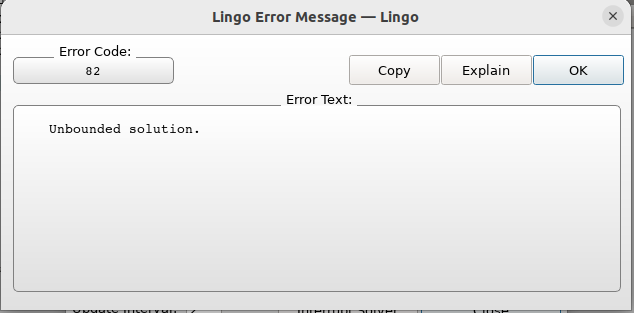

# 6) Transportation

In [25]:
cost_matrix <- matrix(c(6,3,5,4,5,9,2,7,5,7,8,6), nrow = 3, byrow = TRUE)

supply <- c(22, 15, 8)
demand <- c(7, 12, 17,9)

result <- lp.transport(cost = cost_matrix, direction = 'min',
                       row.signs = rep('=', nrow(cost_matrix)),
                       row.rhs = supply,
                       col.signs = rep('=', ncol(cost_matrix)),
                       col.rhs = demand,Optimal Transportation :)

cat('Optimal Transportation :\n')
print(result$solution)

cat('\nTotal Cost:\n')
cat('Z =', result$objval)


# need to solve the constains


Optimal Transportation :
     [,1] [,2] [,3] [,4]
[1,]    0   12    2    8
[2,]    0    0   15    0
[3,]    7    0    0    1

Total Cost:
Z = 149

# 7)  Big M

In [43]:
Obj <- c(3,1,1,1)
Constraints <- matrix(c(-2,2,1,3,1,1), nrow = 2, byrow = TRUE)
Inequality <- c('=', '=')
Rhs <- c(4,6)

result <- lp('min', Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))

Optimal solution:
x1	0.00
x2	0.00

Optimal objective value:
Z = 0.00


# 7) Hungerian method

In [ ]:
cost_matrix <- matrix(c(
  15, 10, 9,
  9, 15, 10,
  10, 12, 8
), nrow = 3, byrow = TRUE)

result <- lp.assign(cost_matrix)

cat("Optimal Assignment:\n")
print(result$solution)

cat("\nTotal Cost :\n")
cat("Z =", result$objval)

# 8) Max= 4*X1 + 6*X2  + 2*X3 ;
- 1*X1+1*X2 +1*X3 <= 3;
- 1*X1 + 4*X2 + 7*X3 <= 9;
-  X1 >= 0;
-  X2 >= 0;
-  X3 >= 0;
- End
- 
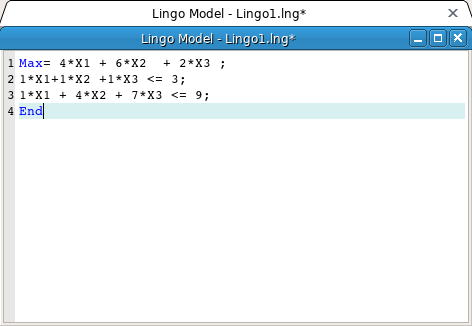

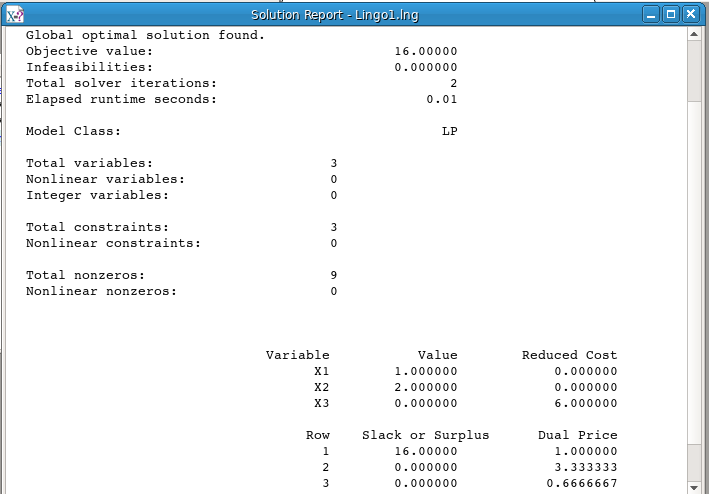

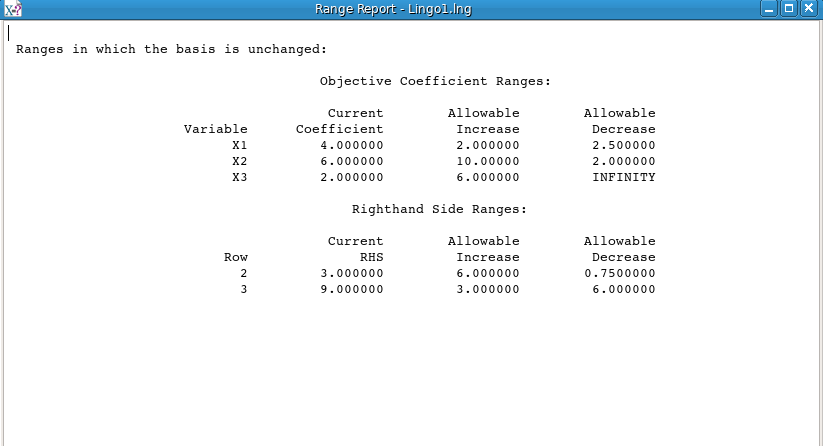

# 9 MAX =3*X1+4*X2+1*X3+7*X4;
 - 8*X1+ 3*X2 + 4*X3+ 1*X4 <= 7;
 - 2*X1+ 6*X2 + 1*X3+ 5*X4 <=3 ;
 - 1*X1+ 4*X2 + 5*X3+ 2*X4 <= 8;
 - X1 >= 0;
 - X2 >= 0;
 - X3 >= 0;
 - X4 >= 0;
 - END


 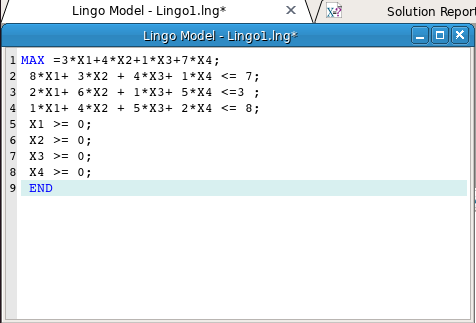

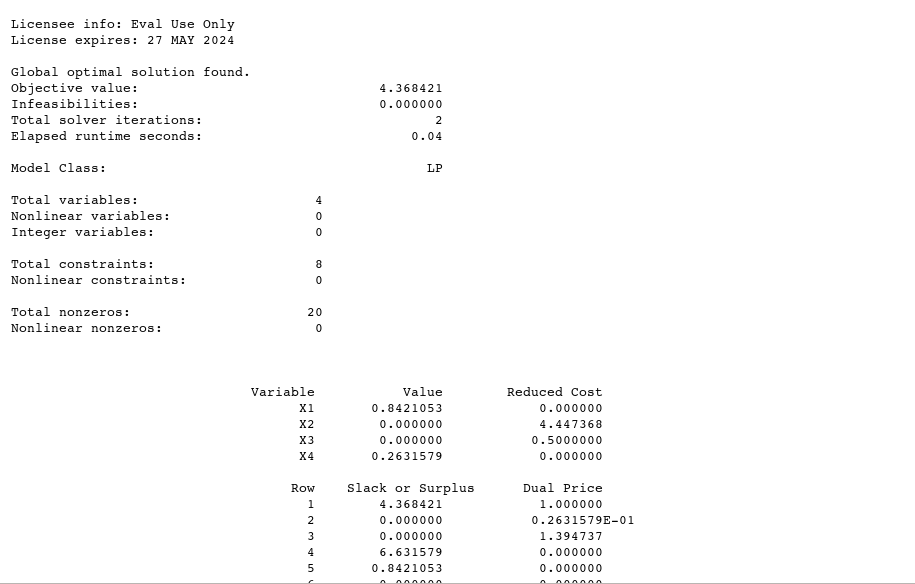


- ADDITIONAL CONSTRAINT

- 2*X1+ 3*X2 + 1*X3+ 5*X4 <= 4;
  
 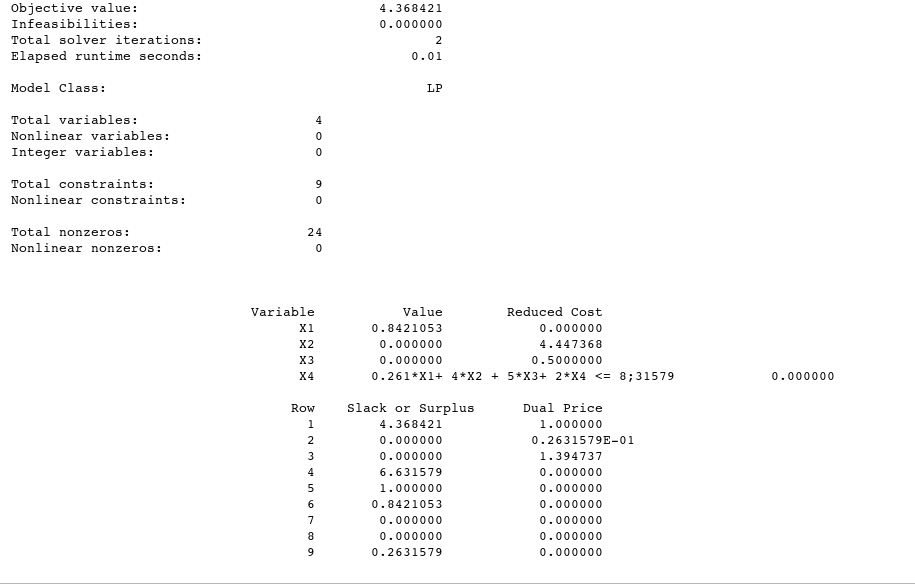

# 10) Machine Operator Processes

In [42]:
setCost <- matrix(c(0, 4, 7, 3,
                   4, 0, 6, 3,
                   7, 6, 0, 7,
                   3, 3, 7, 0), nrow = 4, ncol = 4)

tsp_solution <- find_community(graph_from_adjacency_matrix(setCost), resolution = 0)

item_sequence <- tsp_solution$membership
item_sequence <- item_sequence[!is.na(item_sequence)] 
item_sequence <- as.character(item_sequence)

print("Optimal item sequence:")
print(item_sequence)


ERROR: Error in find_community(graph_from_adjacency_matrix(setCost), resolution = 0): could not find function "find_community"


# 11) Contractors Problem

In [41]:
contractor_bids <- matrix(c(9, 14, 19, 15,
                            7, 17, 20, 19,
                            9, 18, 21, 18,
                            10, 12, 18, 19,
                            10, 15, 21, 16), nrow = 5, byrow = TRUE)

# Function to find the lowest cost for each road
find_lowest_cost <- function(bids) {
  lowest_cost <- rep(0, ncol(bids))
  for (i in 1:ncol(bids)) {
    lowest_cost[i] <- min(bids[, i])
  }
  return(lowest_cost)
}

# Function to find the contractor for each road based on lowest cost
find_contractors <- function(bids) {
  contractors <- rep(0, ncol(bids))
  for (i in 1:ncol(bids)) {
    contractors[i] <- which.min(bids[, i])
  }
  return(contractors)
}

# Find lowest cost for each road
lowest_cost <- find_lowest_cost(contractor_bids)
cat("Lowest cost for each road:", lowest_cost, "\n")

# Find contractors for each road based on lowest cost
contractors <- find_contractors(contractor_bids)
cat("Contractors for each road based on lowest cost:", contractors, "\n")

# Total cost for awarding work to the lowest cost contractors
total_cost <- sum(lowest_cost)
cat("Total cost for awarding work to lowest cost contractors:", total_cost, "lakhs\n")

# If supplementary grants are needed, calculate the amount
grant_amount <- 50 
total_grant_needed <- max(0, total_cost - grant_amount)
cat("Total supplementary grant needed (if any):", total_grant_needed, "lakhs\n")

unsuccessful_contractor <- setdiff(1:5, contractors)
cat("Contractor(s) unsuccessful in their bid:", unsuccessful_contractor, "\n")

Lowest cost for each road: 7 12 18 15 
Contractors for each road based on lowest cost: 2 4 4 1 
Total cost for awarding work to lowest cost contractors: 52 lakhs
Total supplementary grant needed (if any): 2 lakhs
Contractor(s) unsuccessful in their bid: 3 5 


# 12) 3X1 + 2X2 + 5X3

In [ ]:
Obj <- c(3, 2, 5)
Constraints <- matrix(c(1, 2, 1,3, 0, 2,1, 4, 0), nrow =3 , byrow = TRUE)
Inequality <- c('<=','<=','<=' )
Rhs <- c(430, 460, 420)

result <- lp('max', Obj, Constraints, Inequality, Rhs)

cat("Optimal solution:\n")
cat(sprintf("x1\t%.2f\n", result$solution[1]))
cat(sprintf("x2\t%.2f\n", result$solution[2]))

cat("\nOptimal objective value:\n")
cat(sprintf("Z = %.2f\n", result$objval))